**Description**:

This notebook focuses on implementing K-Means clustering using data reduced by PCA, TSNE, and UMAP techniques. It involves extensive exploratory analysis to evaluate different numbers of clusters, metrics, and feature selections to ensure robust clustering before transitioning to supervised learning. The primary focus is on utilizing only demographic attributes to train the clustering models for predicting tone preferences.

## Imports

In [565]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Non-Hierarchical Clustering Models
from sklearn.cluster import KMeans
import umap
from sklearn.manifold import TSNE

# Metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# encoder
from sklearn.preprocessing import OrdinalEncoder


In [566]:
%pip install kmodes scikit-learn-extra 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [567]:
path = '../datasets/FoodInsecurity_Hispanic_Demographics_Tone_Preferences_Dataset.xlsx'

In [568]:
df = pd.read_excel(path)

In [569]:
df.columns

Index(['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status',
       'income', 'employment', 'language', 'disability', 'states', 'sample_1',
       'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7',
       'sample_8'],
      dtype='object')

In [570]:
demographics = df[['age', 'marital_status', 'employment']]

In [571]:
demographics.head(2)

,age,marital_status,employment
0,45-54,na,Employed Part time
1,18-24,single,Employed Part time


In [572]:
df = pd.DataFrame(df)

# Melt the DataFrame to focus on tone samples
melted_df = pd.melt(df, id_vars=['age', 'gender', 'ethnicity', 'race', 'education',
                                 'marital_status', 'income', 'employment', 'language',
                                 'disability', 'states'],
                     value_vars=['sample_1', 'sample_2', 'sample_3', 'sample_4',
                                 'sample_5', 'sample_6', 'sample_7', 'sample_8'],
                     var_name='tone_sample',
                     value_name='tone')

In [573]:
tones = melted_df[['tone']]

In [574]:
tones.head(2)

,tone
0,Persuasive
1,Original


In [575]:
tones_encoded = pd.get_dummies(tones)

## Pre-processing

### Encoding

In [576]:
encoder = OrdinalEncoder()

In [577]:
demographics['age'] = encoder.fit_transform(demographics[['age']])

In [578]:
demographics.head(2)

,age,marital_status,employment
0,3.0,na,Employed Part time
1,0.0,single,Employed Part time


In [579]:
demographics_encoded = pd.get_dummies(demographics)

In [580]:
demographics_encoded.shape
#reduced from 19 to 13 by encoding the ordinal data

(50, 13)

### Scaling Data

In [581]:
scaler = StandardScaler()
demographics_scaled = scaler.fit_transform(demographics_encoded)

In [582]:
demographics_encoded.to_excel('demographics_encoded.xlsx', index=False)


## PCA

In [583]:
pca = PCA(n_components=2)
demographics_pca = pca.fit_transform(demographics_scaled)

# Access the principal components
principal_components = pca.components_

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

### Elbow Method

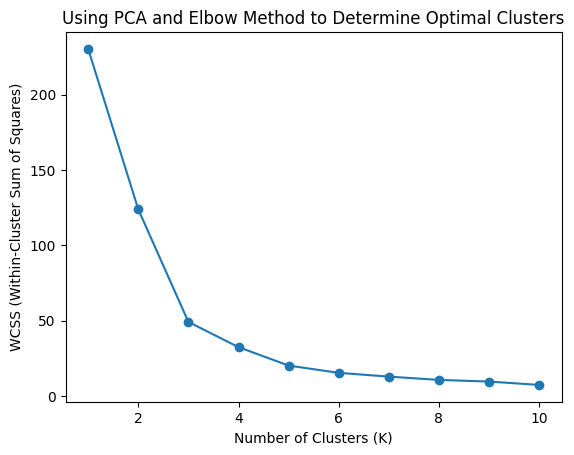

In [584]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(demographics_pca)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plotting the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Using PCA and Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

### Metrics

For n_clusters = 2, the average silhouette score is: 0.49
For n_clusters = 2, the Calinski-Harabasz index is: 41.28
For n_clusters = 2, the Davies-Bouldin score is: 0.87


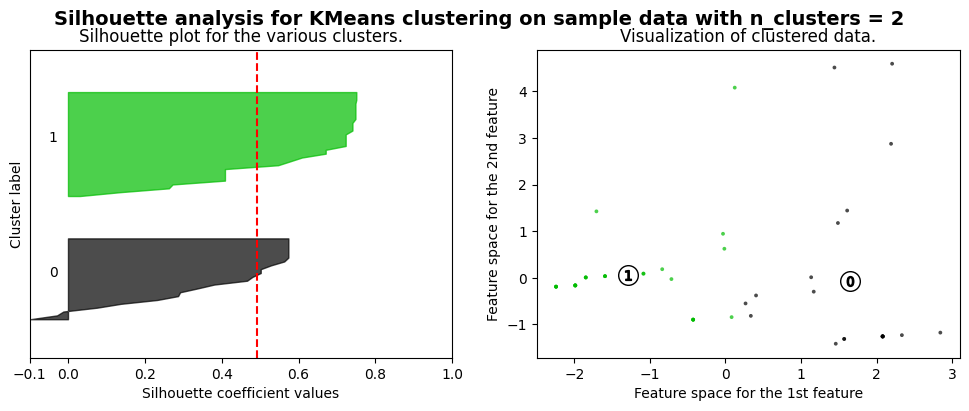

For n_clusters = 3, the average silhouette score is: 0.58
For n_clusters = 3, the Calinski-Harabasz index is: 86.56
For n_clusters = 3, the Davies-Bouldin score is: 0.54


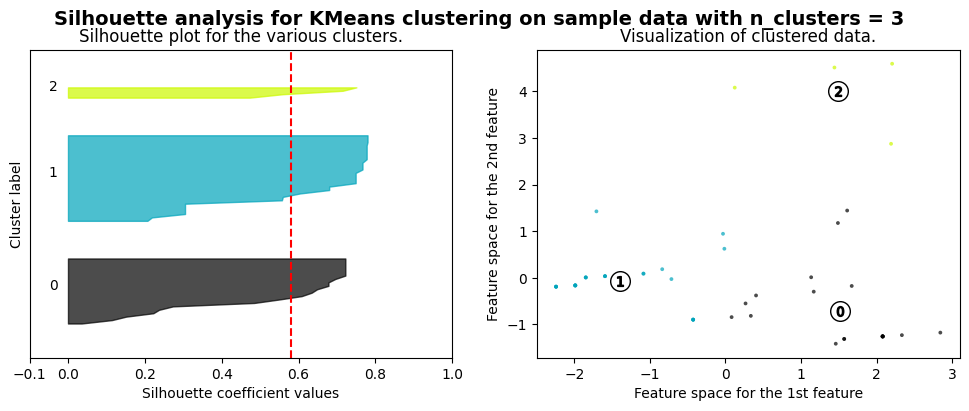

For n_clusters = 4, the average silhouette score is: 0.55
For n_clusters = 4, the Calinski-Harabasz index is: 93.46
For n_clusters = 4, the Davies-Bouldin score is: 0.65


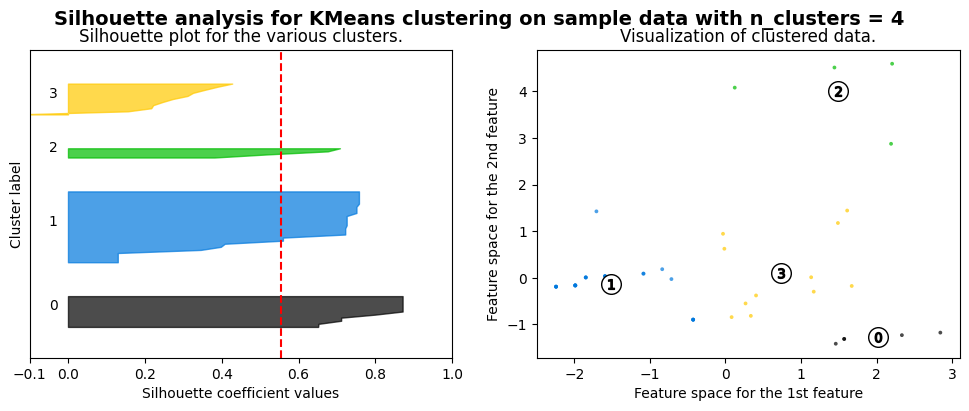

For n_clusters = 5, the average silhouette score is: 0.59
For n_clusters = 5, the Calinski-Harabasz index is: 116.82
For n_clusters = 5, the Davies-Bouldin score is: 0.66


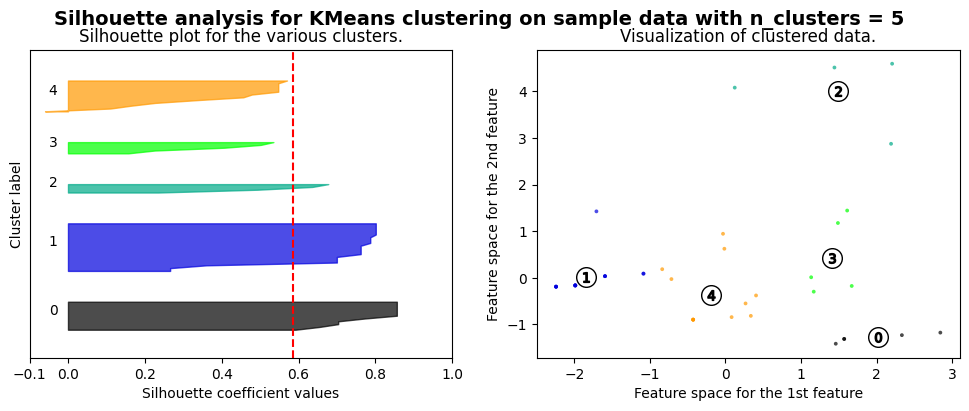

For n_clusters = 6, the average silhouette score is: 0.62
For n_clusters = 6, the Calinski-Harabasz index is: 122.80
For n_clusters = 6, the Davies-Bouldin score is: 0.65


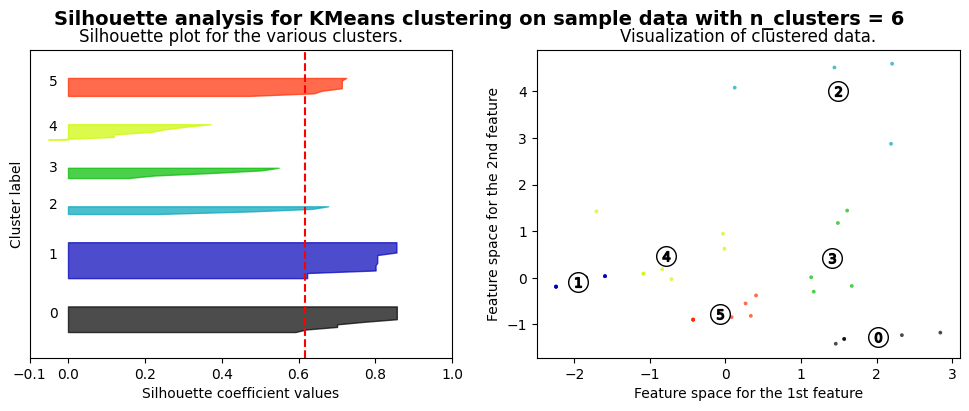

For n_clusters = 7, the average silhouette score is: 0.59
For n_clusters = 7, the Calinski-Harabasz index is: 120.76
For n_clusters = 7, the Davies-Bouldin score is: 0.62


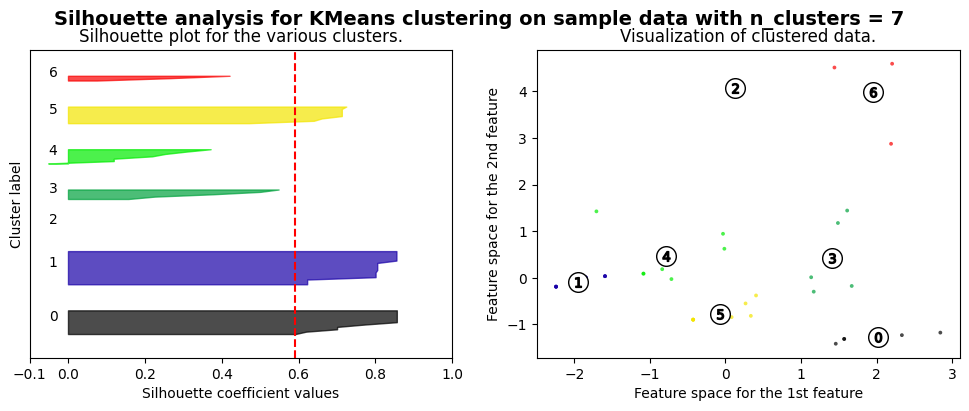

For n_clusters = 8, the average silhouette score is: 0.59
For n_clusters = 8, the Calinski-Harabasz index is: 122.90
For n_clusters = 8, the Davies-Bouldin score is: 0.50


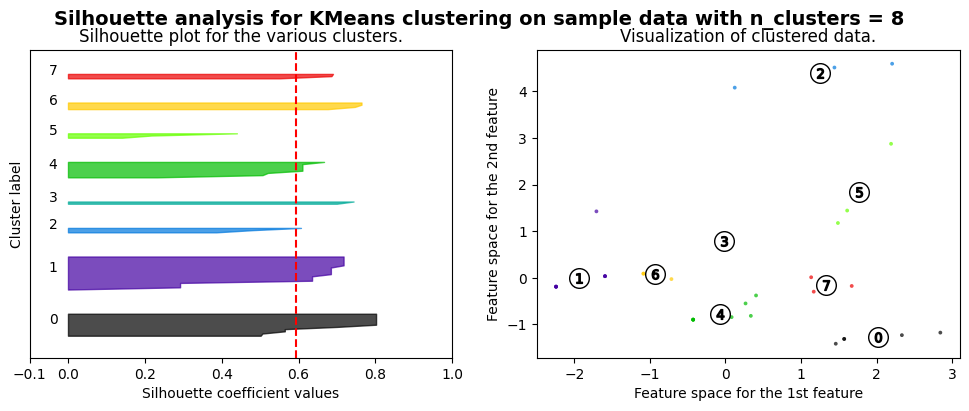

For n_clusters = 9, the average silhouette score is: 0.62
For n_clusters = 9, the Calinski-Harabasz index is: 117.62
For n_clusters = 9, the Davies-Bouldin score is: 0.47


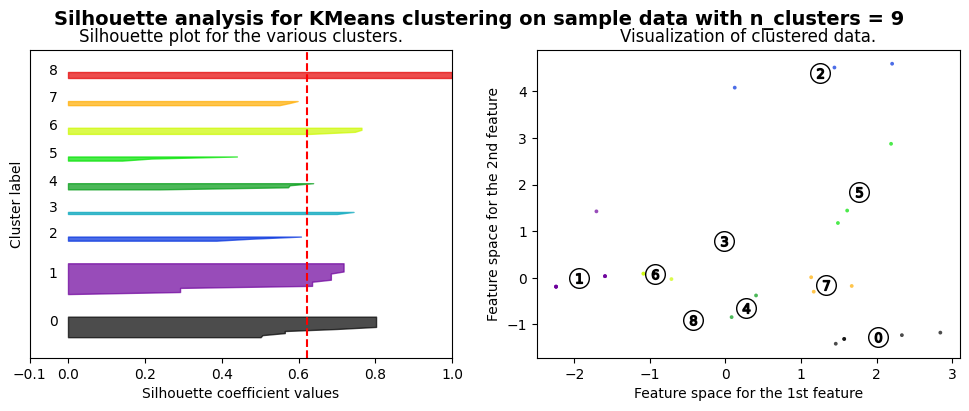

For n_clusters = 10, the average silhouette score is: 0.65
For n_clusters = 10, the Calinski-Harabasz index is: 134.09
For n_clusters = 10, the Davies-Bouldin score is: 0.42


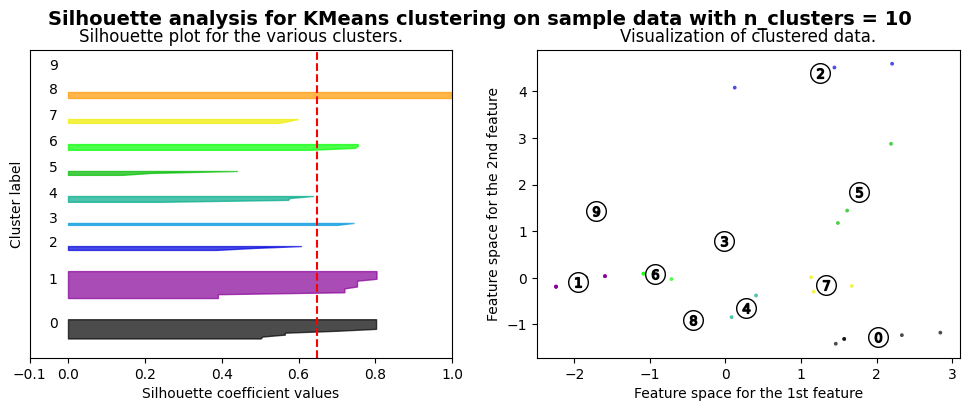

For n_clusters = 11, the average silhouette score is: 0.65
For n_clusters = 11, the Calinski-Harabasz index is: 160.03
For n_clusters = 11, the Davies-Bouldin score is: 0.36


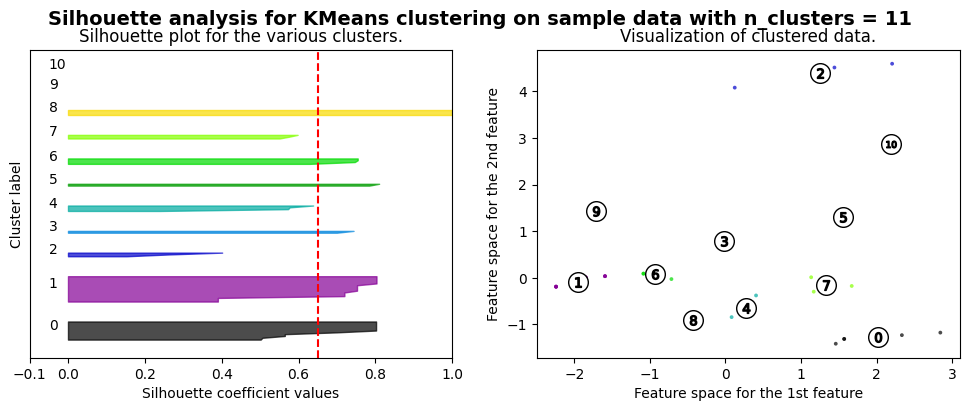

For n_clusters = 12, the average silhouette score is: 0.65
For n_clusters = 12, the Calinski-Harabasz index is: 230.40
For n_clusters = 12, the Davies-Bouldin score is: 0.30


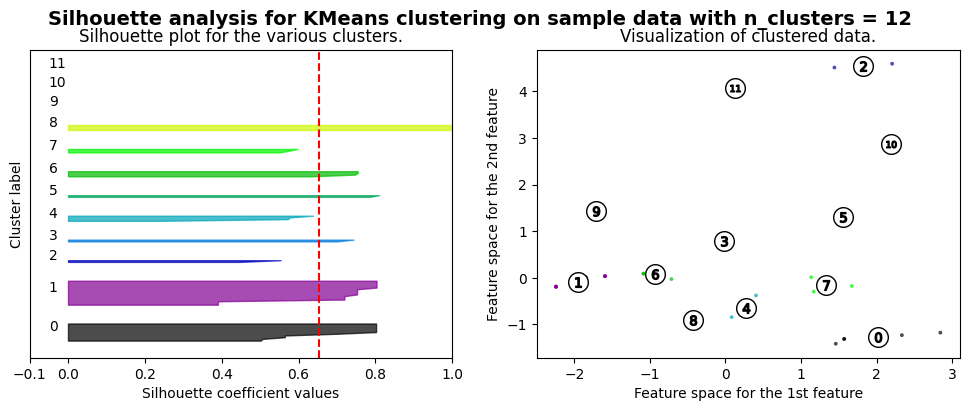

For n_clusters = 13, the average silhouette score is: 0.63
For n_clusters = 13, the Calinski-Harabasz index is: 225.43
For n_clusters = 13, the Davies-Bouldin score is: 0.25


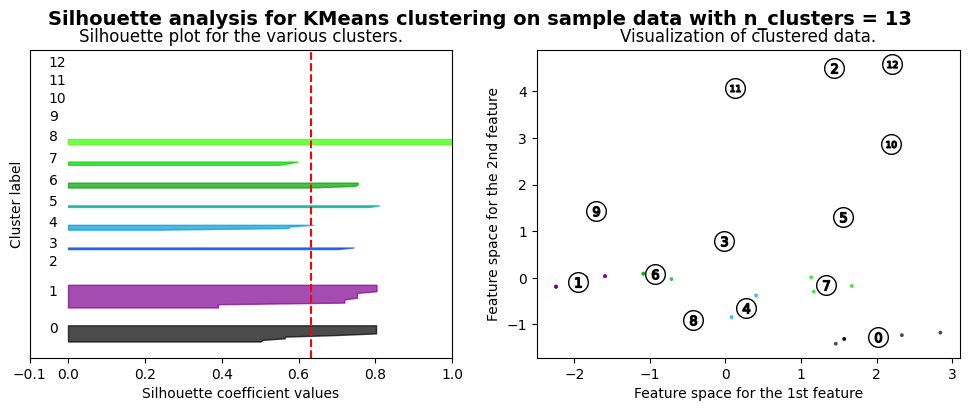

For n_clusters = 14, the average silhouette score is: 0.64
For n_clusters = 14, the Calinski-Harabasz index is: 301.51
For n_clusters = 14, the Davies-Bouldin score is: 0.26


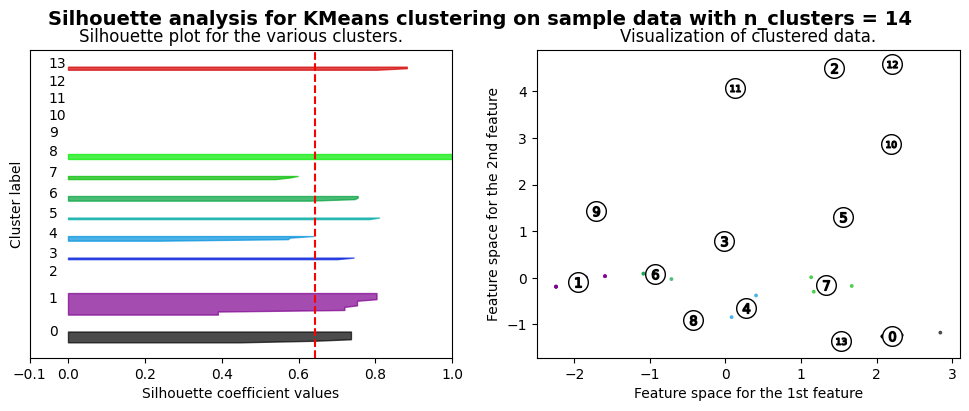

For n_clusters = 15, the average silhouette score is: 0.65
For n_clusters = 15, the Calinski-Harabasz index is: 351.09
For n_clusters = 15, the Davies-Bouldin score is: 0.23


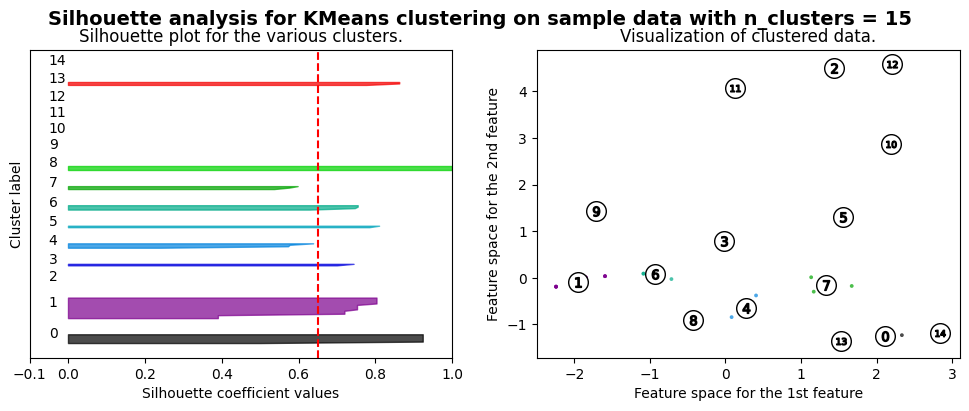

For n_clusters = 16, the average silhouette score is: 0.61
For n_clusters = 16, the Calinski-Harabasz index is: 476.00
For n_clusters = 16, the Davies-Bouldin score is: 0.23


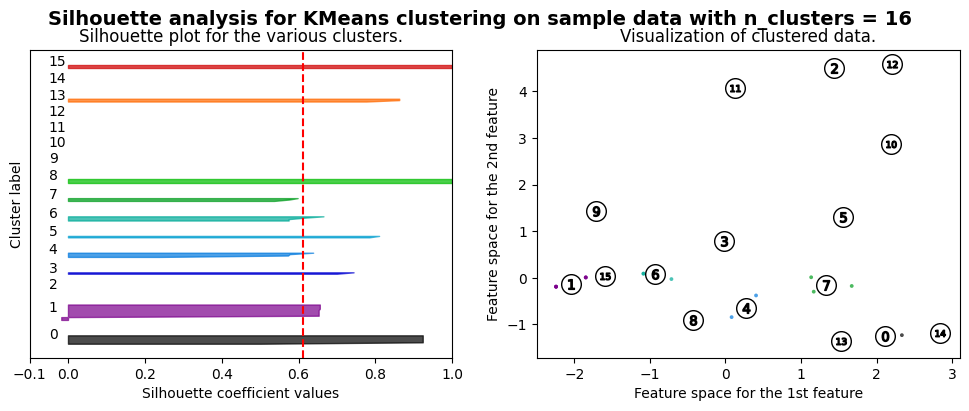

For n_clusters = 17, the average silhouette score is: 0.61
For n_clusters = 17, the Calinski-Harabasz index is: 456.71
For n_clusters = 17, the Davies-Bouldin score is: 0.22


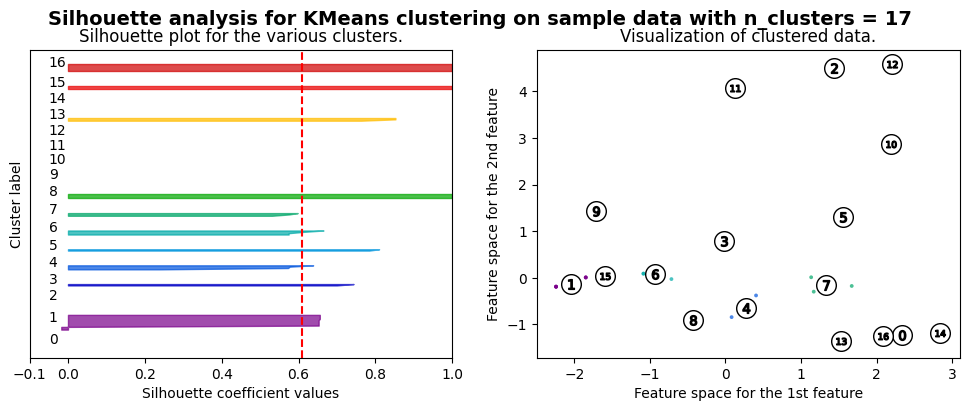

For n_clusters = 18, the average silhouette score is: 0.61
For n_clusters = 18, the Calinski-Harabasz index is: 459.44
For n_clusters = 18, the Davies-Bouldin score is: 0.24


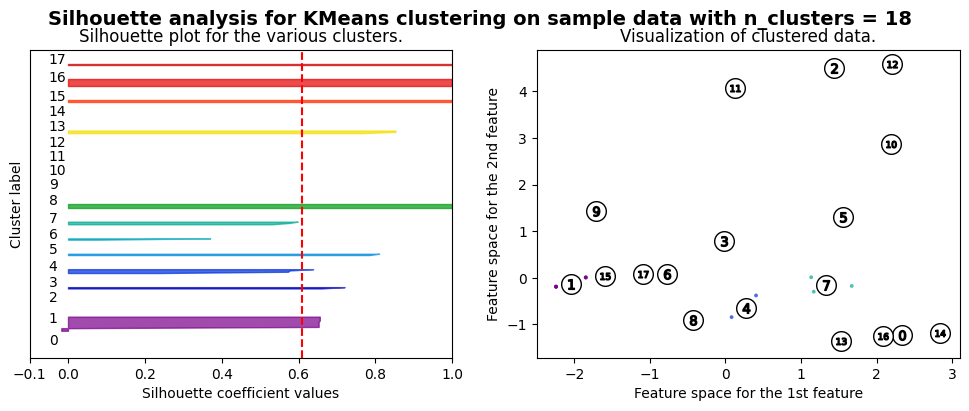

For n_clusters = 19, the average silhouette score is: 0.59
For n_clusters = 19, the Calinski-Harabasz index is: 520.80
For n_clusters = 19, the Davies-Bouldin score is: 0.21


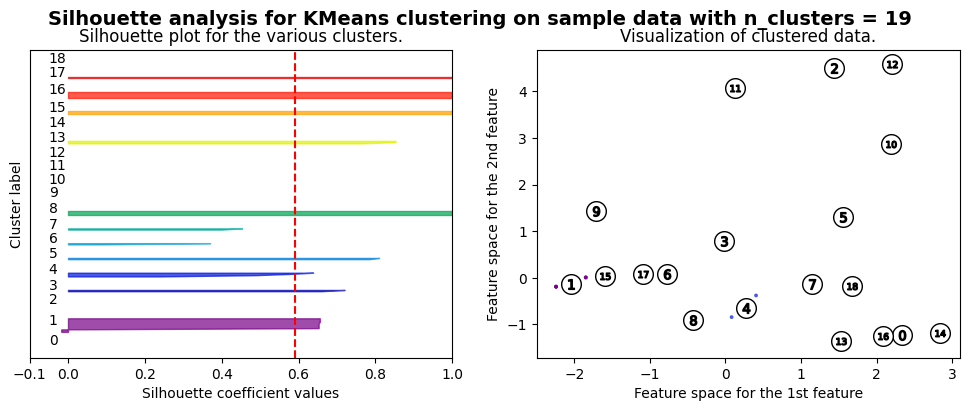

For n_clusters = 20, the average silhouette score is: 0.58
For n_clusters = 20, the Calinski-Harabasz index is: 595.13
For n_clusters = 20, the Davies-Bouldin score is: 0.24


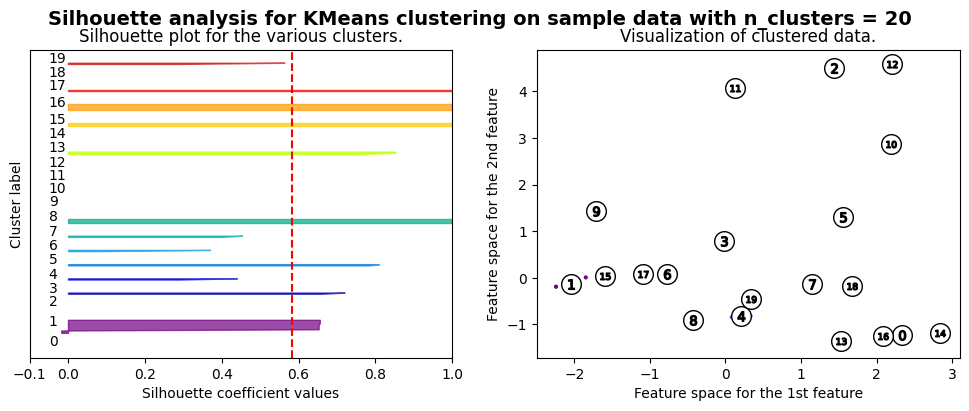

In [585]:
range_n_clusters = [2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(demographics_pca) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(demographics_pca)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(demographics_pca, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg:.2f}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(demographics_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(demographics_pca[:, 0], demographics_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Compute and print the Calinski-Harabasz index and Davies-Bouldin score
    calinski_harabasz = calinski_harabasz_score(demographics_pca, cluster_labels)
    davies_bouldin = davies_bouldin_score(demographics_pca, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the Calinski-Harabasz index is: {calinski_harabasz:.2f}")
    print(f"For n_clusters = {n_clusters}, the Davies-Bouldin score is: {davies_bouldin:.2f}")

    plt.show()

### Initialization

In [586]:
# Create an instance of the KMeans model
kmeans = KMeans(n_clusters=4, n_init='auto')
cluster_labels_pca = kmeans.fit_predict(demographics_pca)
# look at correlation between people and tone preferences

### Data Points in clusters

In [587]:
unique, counts = np.unique(cluster_labels_pca, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Cluster Sizes:", cluster_sizes)

Cluster Sizes: {0: 12, 1: 20, 2: 4, 3: 14}


### Visualizing Clusters

In [588]:
pca_df = df.copy()

In [589]:
pca_df['Cluster'] = cluster_labels_pca

In [590]:
cluster_labels_pca

array([3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 0, 1, 1, 1, 2, 3, 0, 3, 0, 0,
       0, 3, 1, 3, 1, 1, 1, 1, 3, 0, 3, 3, 0, 0, 3, 2, 3, 2, 2, 3, 3, 0,
       0, 0, 1, 1, 1, 0])

In [591]:
# pca_df.to_excel('../datasets/pca-dem-clusters.xlsx', index=False)

In [592]:
id_vars = pca_df.columns.difference(['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'])

In [593]:
# Melt dataframe
pca_graphs = pd.melt(pca_df, id_vars=id_vars, value_vars=['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7', 'sample_8'],value_name='tone')
pca_graphs.drop('variable',axis=1, inplace=True)

In [594]:
pca_graphs.head(2)

,Cluster,age,disability,education,employment,ethnicity,gender,income,language,marital_status,race,states,tone
0,3,45-54,i do not have a disability,High School,Employed Part time,non hispanic,female,"$25,000 - $49,999",both,na,native american,indiana,Persuasive
1,1,18-24,i do not have a disability,High School,Employed Part time,hispanic,male,"Less than $25,000",english,single,white,illinois,Original


In [595]:
pca_graphs.shape

(400, 13)

In [596]:
# List of columns to plot
columns_to_plot = ['age', 'disability', 'education', 'employment', 'ethnicity', 'gender', 'income', 'language', 'marital_status', 'race', 'tone']

### Visualization by Cluster

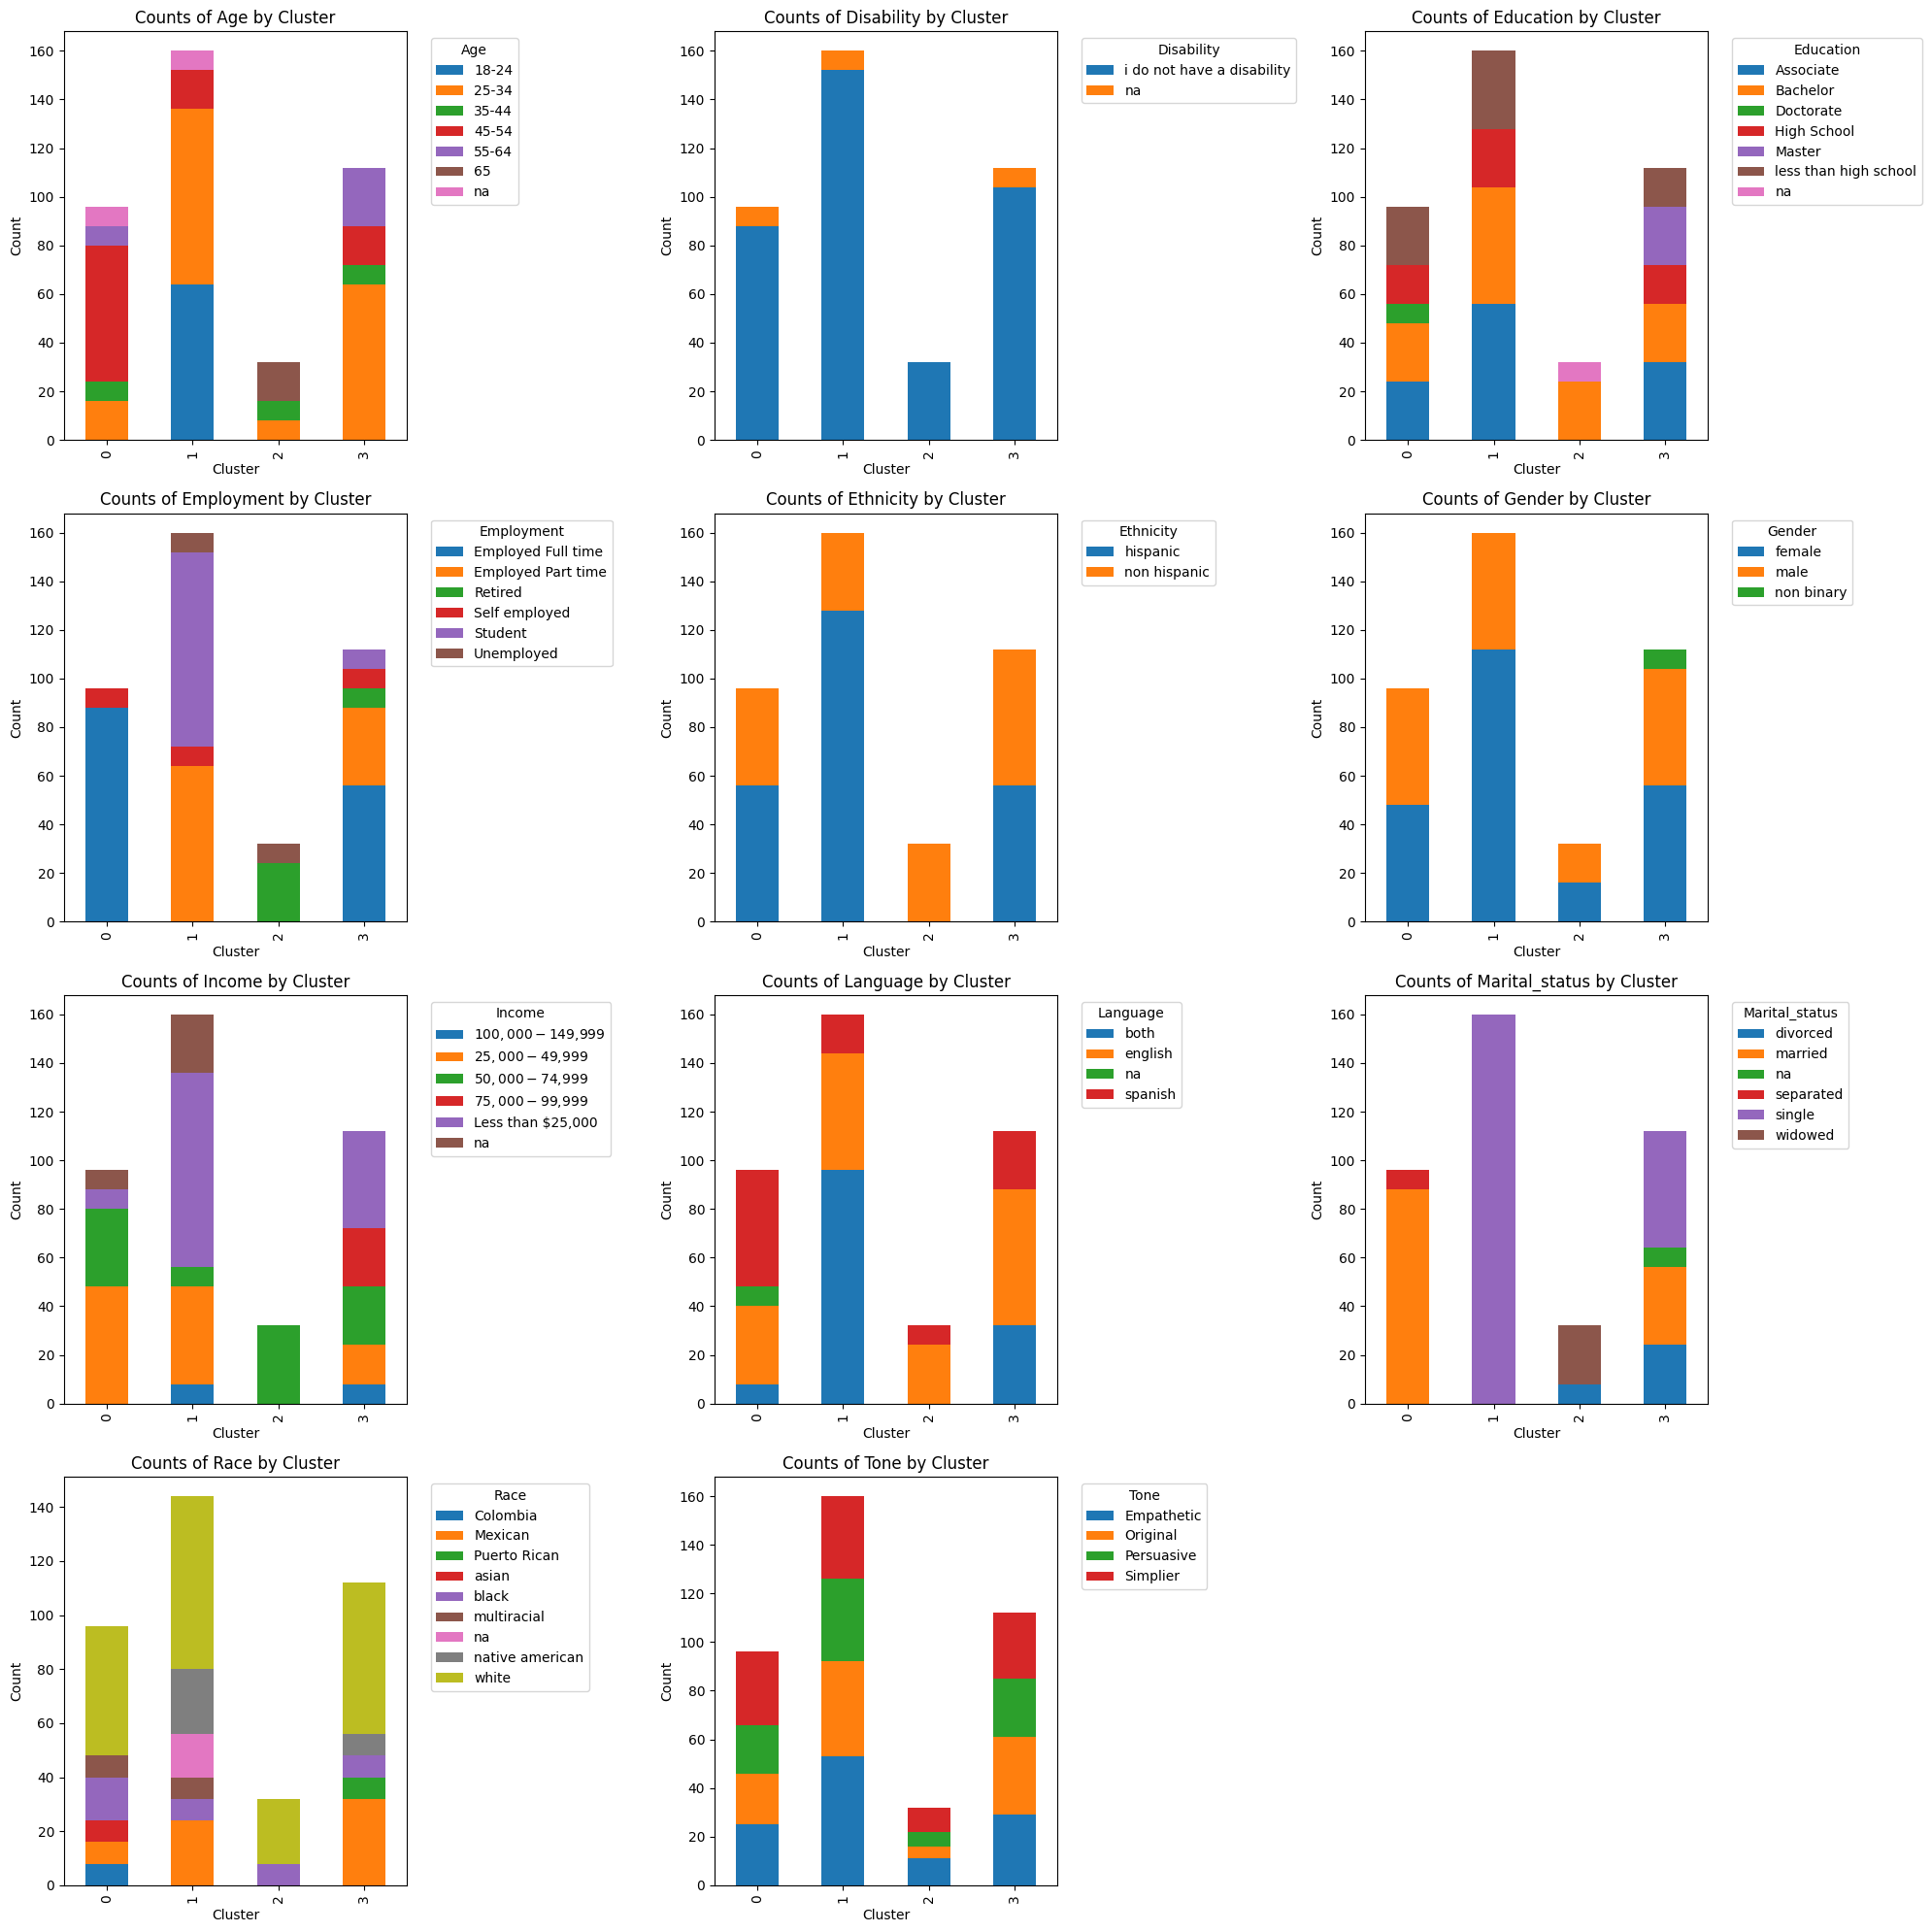

In [597]:
# Number of columns and rows for the subplots grid
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate stacked bar charts for each column
for idx, column in enumerate(columns_to_plot):
    # Aggregate data for the given column
    cluster_option_counts = pca_graphs.groupby(['Cluster', column]).size().unstack(fill_value=0)
    
    # Plotting the stacked bar chart on the corresponding subplot
    ax = cluster_option_counts.plot(kind='bar', stacked=True, ax=axes[idx])
    
    # Add labels and title
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')
    ax.set_title(f'Counts of {column.capitalize()} by Cluster')
    ax.legend(title=column.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout for the subplot
    plt.tight_layout()

# Remove any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Show all plots
plt.show()

## Tabulation
09-07-2024

In [598]:
# Define the threshold (e.g., 0.3 for 30%)
threshold = 0.3

# Create a mask where the values are above the threshold
tone_preference_above_threshold = tone_preference_by_cluster >= threshold

# Display the filtered cross-tabulation
print(tone_preference_by_cluster[tone_preference_above_threshold])


tone     Empathetic  Original  Persuasive  Simplier
Cluster                                            
0          0.303571       NaN         NaN       NaN
1               NaN       NaN         NaN  0.333333
2          0.416667       NaN         NaN  0.333333
3               NaN   0.40625         NaN       NaN
4          0.437500   0.31250         NaN       NaN
5               NaN   0.50000         NaN       NaN
6               NaN       NaN      0.4375       NaN
7               NaN       NaN         NaN  0.312500
8          0.406250       NaN         NaN       NaN
9          0.333333       NaN         NaN       NaN
10              NaN       NaN         NaN  0.458333
11         0.500000       NaN         NaN       NaN


In [599]:
import plotly.express as px

# Convert the data into a long format suitable for Plotly
tone_preference_by_cluster_long = tone_preference_by_cluster.reset_index().melt(id_vars='Cluster', var_name='Tone', value_name='Proportion')

# Plot the stacked bar chart using Plotly
fig = px.bar(tone_preference_by_cluster_long, x='Cluster', y='Proportion', color='Tone', 
             title='Tone Preferences by Demographic Clusters', labels={'Proportion': 'Proportion of Tone Preferences'})

# Customize the layout
fig.update_layout(barmode='stack', xaxis_title='Cluster', yaxis_title='Proportion of Tone Preferences')

# Show the plot
fig.show()


In [600]:
import scipy.stats as stats

# Perform the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(pca_graphs['Cluster'], pca_graphs['tone']))

# Display the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")


Chi-Square Statistic: 6.911913073918552
P-Value: 0.6462901455722452


In [601]:
combined_df = pd.concat([demographics_encoded, tones_encoded], axis=1)

In [602]:
cluster_label = pd.DataFrame(pca_graphs, columns=['Cluster'])

In [603]:
combined_df = pd.concat([combined_df, cluster_label], axis=1)

In [604]:
tone_averages = combined_df.groupby('Cluster').mean().reset_index()


In [605]:
from math import pi

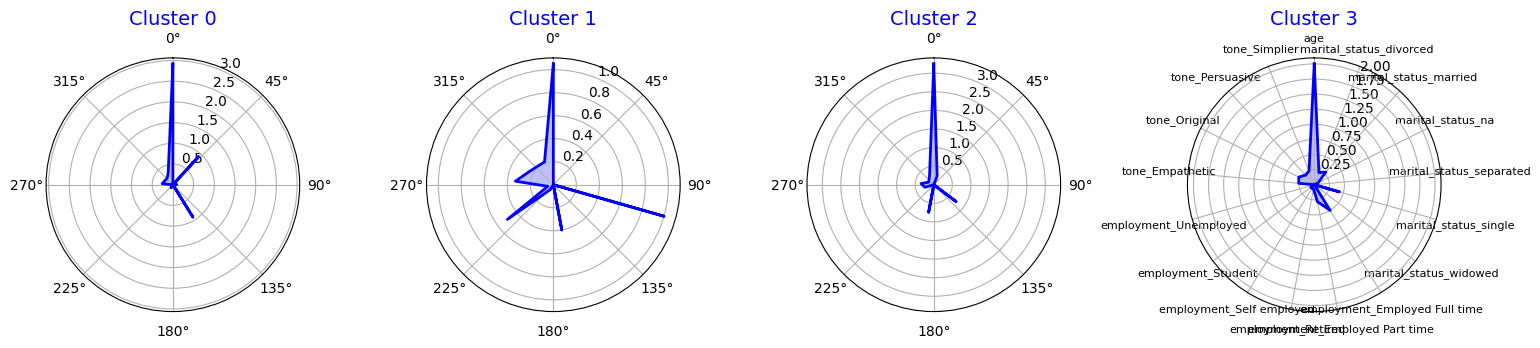

In [606]:
# Prepare data
labels = tone_averages.columns[1:]  # Exclude 'Cluster' column
num_vars = len(labels)

# Create a radar chart
def create_radar_chart(df, cluster_label, ax):
    # Number of variables
    num_vars = len(labels)
    
    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    
    # The radar chart requires a full circle
    values = df.loc[df['Cluster'] == cluster_label, labels].values.flatten().tolist()
    values += values[:1]
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw one axe per feature and add labels
    plt.xticks(angles[:-1], labels, color='black', size=8)
    
    # Draw ylabels
    ax.set_rscale('linear')
    
    # Plot data
    ax.plot(angles, values, color='blue', linewidth=2, linestyle='solid', label=f'Cluster {cluster_label}')
    ax.fill(angles, values, color='blue', alpha=0.25)
    
    # Add a title
    ax.set_title(f'Cluster {cluster_label}', size=14, color='blue', y=1.1)

# Create subplots
fig, axs = plt.subplots(1, len(tone_averages['Cluster'].unique()), subplot_kw=dict(polar=True), figsize=(18, 8))
fig.subplots_adjust(wspace=0.5)

# Plot radar charts for each cluster
for cluster in tone_averages['Cluster'].unique():
    ax = axs[cluster]
    create_radar_chart(tone_averages, cluster, ax)

# Show plot
plt.show()